In [1]:
# Filtering out the warnings

import warnings

warnings.filterwarnings('ignore')

In [2]:
# Import the required Libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Read the data in pandas
inp0= pd.read_csv("application_data.csv")
inp0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 200)

In [6]:
# Determining the shape of the datset
inp0.shape

(307511, 122)

In [7]:
# Determining null values in each columns
inp0.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [8]:
# Missing percentage of null values in each columns
missing_percentages = (inp0.isnull().sum()*100/len(inp0))
missing_percentages

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

In [9]:
#some columns have more than 47 percent null values so it
# Dropping all the columns where missing values are greater than 47%
inp0 = inp0.loc[:, inp0.isnull().mean() <= .47]

In [10]:
inp0.shape

(307511, 73)

In [11]:
# Removing unwanted columns from the dataset
unwanted_col = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE','FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT',
          'REGION_RATING_CLIENT_W_CITY', 'REGION_POPULATION_RELATIVE', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE',
            'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
          'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
          'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
          'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
          'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

inp0.drop(labels=unwanted_col,axis=1,inplace=True)

In [12]:
inp0.shape

(307511, 37)

In [13]:
# Checking the column-wise info of the dataframe
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 37 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [14]:
#now doing imputation of values where missing values are less than aroung 14 percent
inp0.AMT_ANNUITY.describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [15]:
inp0['AMT_ANNUITY'].fillna(inp0.AMT_ANNUITY.median(), inplace=True)

In [16]:
inp0['AMT_GOODS_PRICE'].describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [17]:
# Imputing Missing values in AMT_GOODS_PRICE column with median
Avg=inp0.AMT_REQ_CREDIT_BUREAU_YEAR.median()
inp0['AMT_GOODS_PRICE'].fillna(Avg, inplace=True)

In [18]:
# Missing values in NAME_TYPE_SUITE should be replaced with the MODE value i.e 'Unaccompanied'
inp0['NAME_TYPE_SUITE'].fillna(inp0['NAME_TYPE_SUITE'].mode, inplace=True)

In [19]:
# Imputing Missing values in the following columns with 0. We are assuming that missing means that there were no inquiries for the person.
inp0[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
    'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']] = inp0[['AMT_REQ_CREDIT_BUREAU_HOUR',
    'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK' ,'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT',
    'AMT_REQ_CREDIT_BUREAU_YEAR']].fillna(value=0.0)

In [20]:
#There are few columns where the value is mentioned as 'XNA' which means 'Not Available'. So we have to find the number of rows and columns and implement suitable techniques on them to fill those missing values or to delete them.
inp0['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [21]:
#There are 4 XNA values in CODE_GENDER column. Female is having the majority. Hence updating those XNA values with Gender 'F' as there will be no impact on the dataset.
inp0.loc[inp0['CODE_GENDER']=='XNA','CODE_GENDER']='F'
inp0['CODE_GENDER'].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [22]:
# We don't have enough information about XNA values so placing all XNA values to Other category in ORGANIZATION_TYPE column.
inp0['ORGANIZATION_TYPE'] = inp0['ORGANIZATION_TYPE'].replace(['XNA'],'Other')

In [23]:
inp0['ORGANIZATION_TYPE'].value_counts()

Other                     72057
Business Entity Type 3    67992
Self-employed             38412
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transport: type 3          1187
Industry

Checking Data types of columns¶

In [24]:
inp0.select_dtypes('object').columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE'],
      dtype='object')

In [25]:
inp0.select_dtypes('float').columns 

Index(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_REGISTRATION', 'CNT_FAM_MEMBERS', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

In [26]:
inp0.select_dtypes(['int', 'int64']).columns 

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY'],
      dtype='object')

In [27]:
# Following variabes could not be float (number of days,number of enquiries and number of family members). SO converting few of them to integer
inp0['DAYS_REGISTRATION'] = pd.to_numeric(inp0['DAYS_REGISTRATION'])
inp0['CNT_FAM_MEMBERS'] = inp0['CNT_FAM_MEMBERS'].astype(int,errors='ignore')
inp0['AMT_REQ_CREDIT_BUREAU_HOUR'] = inp0['AMT_REQ_CREDIT_BUREAU_HOUR'].astype(int,errors='ignore')

checking imbalance

In [28]:
#  Counting number of zero's and one's in TARGET variable
count0=(inp0['TARGET'] == 0).sum()
count1=(inp0['TARGET'] == 1).sum()

count1 = (count1/len(inp0['TARGET']))*100
count0 = (count0/len(inp0['TARGET']))*100

In [29]:
#  Calculating imbalance ratio
round(count0/count1,2)

11.39

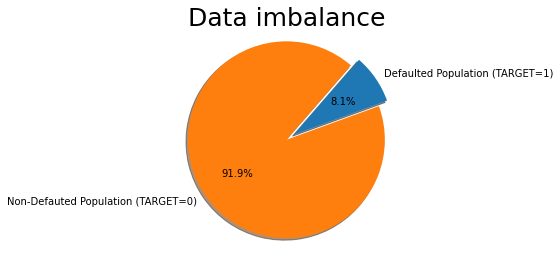

In [30]:
# Plotting pie chart of imbalance
x = ['Defaulted Population (TARGET=1)','Non-Defauted Population (TARGET=0)']
y = [count1, count0]

explode = (0.1, 0)  

fig1, ax1 = plt.subplots()
ax1.pie(y, explode=explode, labels=x, autopct='%1.1f%%',shadow=True, startangle=20)
ax1.axis('equal') 
plt.title('Data imbalance',fontsize=25)
plt.show()

Inference:
The imbalance ratio is 11.39 and in the application data there is high imbalance with defaulted population i.e 8.1%  and for Non-defualted population at 91.9% 


checking for outliers

In [31]:
# Describing dataset
inp0.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.487841,5.379095e+05,-16036.995067,63815.045904,-4986.120328,-2994.202373,2.152665,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.005538,0.006055,0.029723,0.231293,0.229631,1.643447
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.461065,3.696338e+05,4363.988632,141275.766519,3522.886321,1509.450419,0.910682,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,0.078014,0.103037,0.190728,0.856810,0.744059,1.855821
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,1.000000e+00,-25229.000000,-17912.000000,-24672.000000,-7197.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,-19682.000000,-2760.000000,-7479.500000,-4299.000000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,-15750.000000,-1213.000000,-4504.000000,-3254.000000,2.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,-12413.000000,-289.000000,-2010.000000,-1720.000000,3.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,-7489.000000,365243.000000,0.000000,0.000000,20.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


Derived Metrics
Now, Creating bins for continous variable categories column 'AMT_INCOME_TOTAL' and 'DAYS_BIRTH'

In [32]:
inp0['AMT_INCOME_TOTAL'].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [33]:
#Creating bin variable
inp0.loc[:,'INCOME_RANGE']=pd.qcut(inp0.loc[:,'AMT_INCOME_TOTAL'],q=[0,0.20,0.50,0.90,1],
labels=['Low','Medium','High','Very_high'])

In [34]:
#Verifying Binned Variable
inp0['INCOME_RANGE'].value_counts()

High         126590
Medium        90089
Low           63671
Very_high     27161
Name: INCOME_RANGE, dtype: int64

In [35]:
# Converting days of birth into years
inp0['AGE'] = abs(inp0['DAYS_BIRTH']//365.25)
inp0.drop(['DAYS_BIRTH'],axis=1,inplace=True)

In [36]:
inp0.AGE.describe()

count    307511.000000
mean         44.404607
std          11.945771
min          21.000000
25%          34.000000
50%          44.000000
75%          54.000000
max          70.000000
Name: AGE, dtype: float64

In [38]:
#Creating binned variable for AGE
bins=[20,25,30,35,40,45,50,55,60,100]
slots=['20-25','25-30','30-35','35-40','40-45','45-50','50-55','55-60','60 above']
inp0['AGE_GROUP'] = pd.cut(inp0.AGE,bins=bins, labels=slots)

In [39]:
#Checking binned variable
inp0.AGE_GROUP.value_counts()

35-40       42873
40-45       41388
30-35       39476
60 above    35286
45-50       35193
50-55       34997
55-60       33112
25-30       32953
20-25       12233
Name: AGE_GROUP, dtype: int64

Splitting Data with respect to TARGET = 0 and TARGET = 1¶

In [41]:
# Creating two different dataset w.r.t target variable
target0_inp0=inp0.loc[inp0['TARGET']==0]
target1_inp0=inp0.loc[inp0['TARGET']==1]

Univariate Analysis with respect to TAGET 0 and TARGET 1 for categorical variables

In [44]:
# function to plot for categorical variables
def plotfunc(var):
    plt.figure(figsize=(15,5))
    
    plt.subplot(1, 2, 1)
    sns.countplot(var, data=target0_inp0)
    plt.title('Distribution of '+ '%s' %var +' for Non-Defaulters', fontsize=12)
    plt.xlabel(var)
    plt.xticks(rotation=90)
    plt.ylabel('Number of cases for non-defaulters')
    
    plt.subplot(1, 2, 2)
    sns.countplot(var, data=target1_inp0)
    plt.title('Distribution of '+ '%s' %var +' for Defaulters', fontsize=12)
    plt.xlabel(var)
    plt.xticks(rotation=90)
    plt.ylabel('Number of cases for defaulters')
    plt.show()

Unordered Categorical Variables

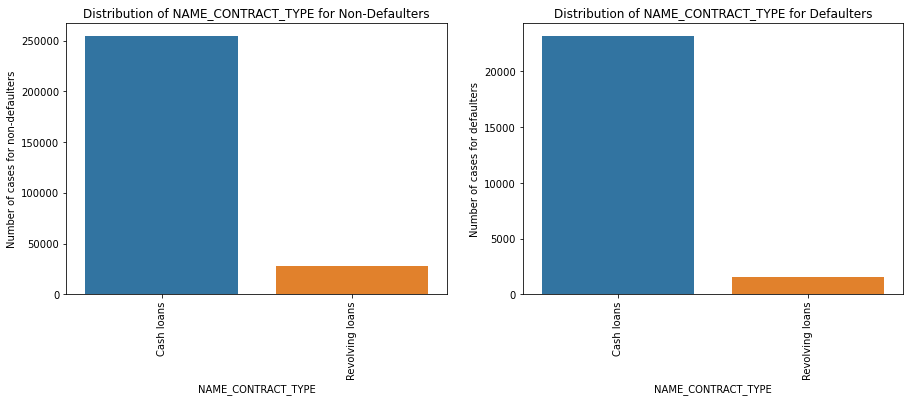

In [45]:
plotfunc('NAME_CONTRACT_TYPE')

Inference:
Revolving loans are comparatively safer and are lesser in defaulted population.


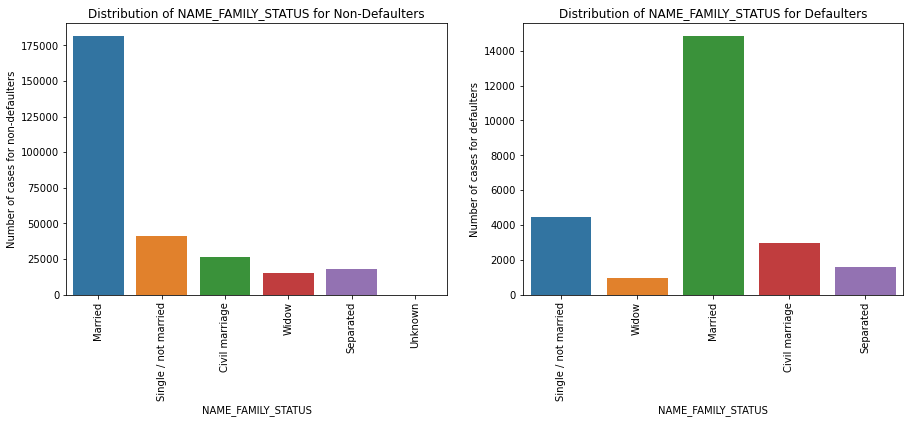

In [46]:
plotfunc('NAME_FAMILY_STATUS')

Inference:
Single applicants have higher default and not married is much higher in defaulted population compared to non defaulted population.


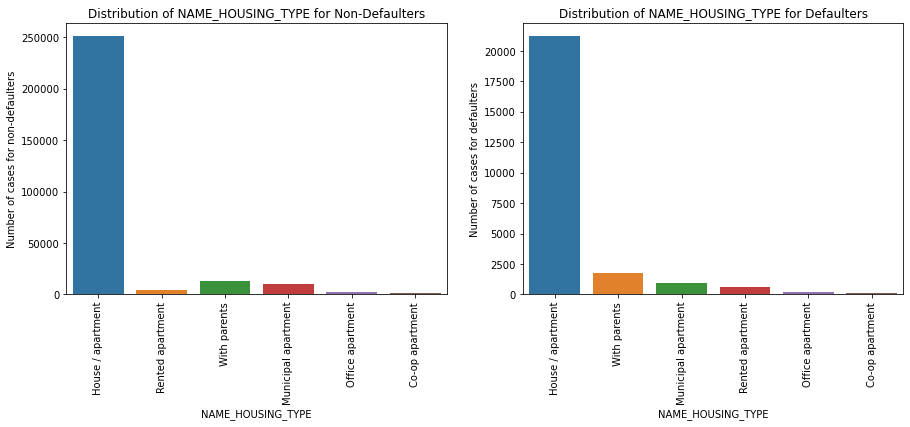

In [47]:
plotfunc('NAME_HOUSING_TYPE')

Inference:
Population living in Rented apartments have higher default rate as cash outflow towards rent is more.
Population living in with parents have higher default rate as income is not too high thus they face difficulty in repayment of loan.


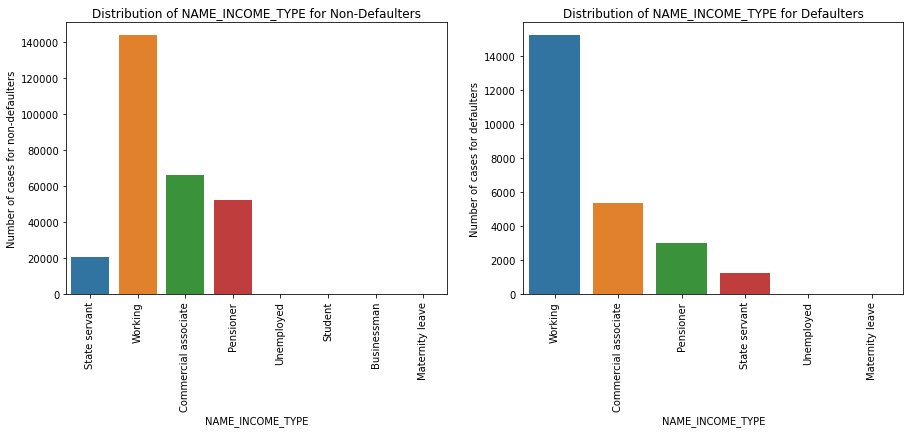

In [48]:
plotfunc('NAME_INCOME_TYPE')

Inference:
Less number of defaulters are from state servant and more defaulters are from working population


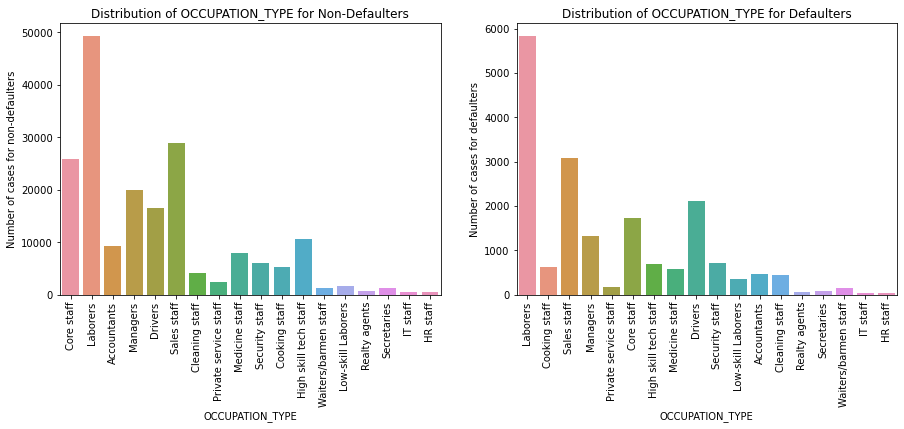

In [49]:
plotfunc('OCCUPATION_TYPE')

Inference:
Low skill laborer’s are higher in number for the non repayment of loan and laborers with income around 50k,sales and core staff have highest number of loan application.

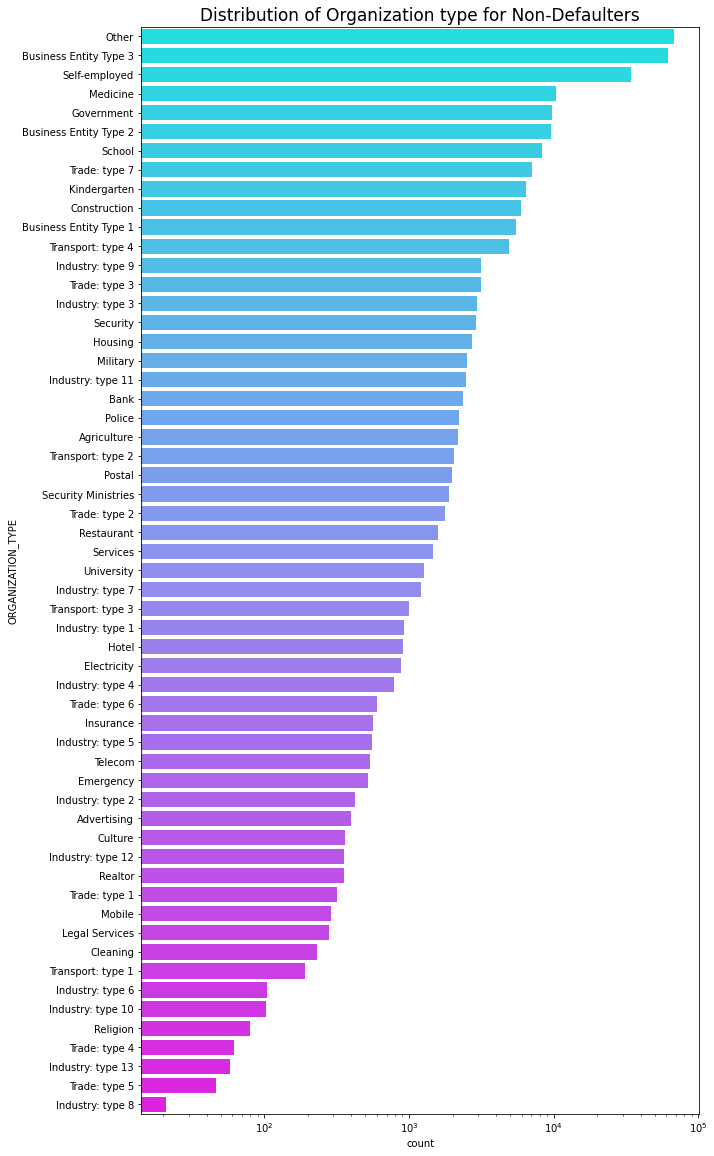

In [50]:
plt.figure(figsize=(10,20))

plt.title("Distribution of Organization type for Non-Defaulters", fontsize=17)

plt.xscale('log')

sns.countplot(data=target0_inp0,y='ORGANIZATION_TYPE',order=target0_inp0['ORGANIZATION_TYPE'].value_counts().index,palette='cool')

plt.show()

Inference:
There are less applications from industry type 8, type 5,type 13,type 4 and religion and highest applications are from most of the organization type ‘Other’ , ‘Business entity Type 3’ , ‘Self employed’ , ‘Medicine’ and ‘Government’.


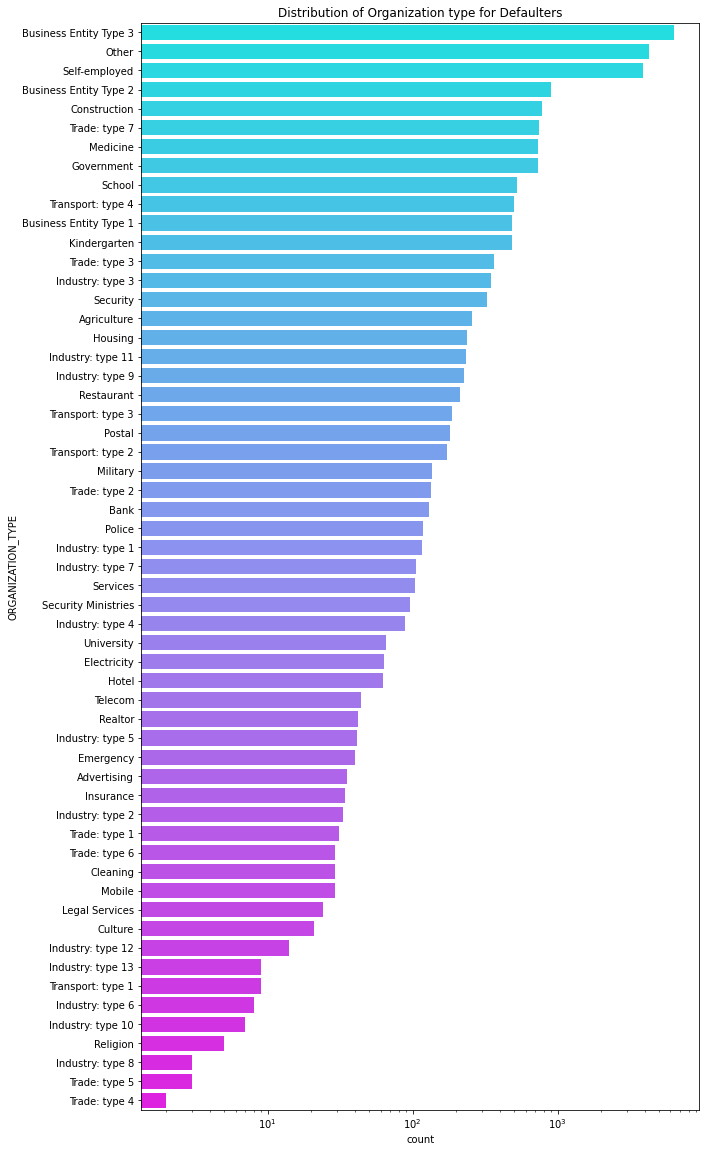

In [51]:
plt.figure(figsize=(10,20))


plt.title("Distribution of Organization type for Defaulters")

plt.xscale('log')

sns.countplot(data=target1_inp0,y='ORGANIZATION_TYPE',order=target1_inp0['ORGANIZATION_TYPE'].value_counts().index,palette='cool')

plt.show()

Inference:
Less applications are from Industry type 4,type 8, type 5, type 10 and religion. and highest number of loan applications are from most of the organization type 'Business entity Type 3', 'Other' , 'Self employed' , 'Business entity Type 2' and 'Construction'.


Ordered categorical variables

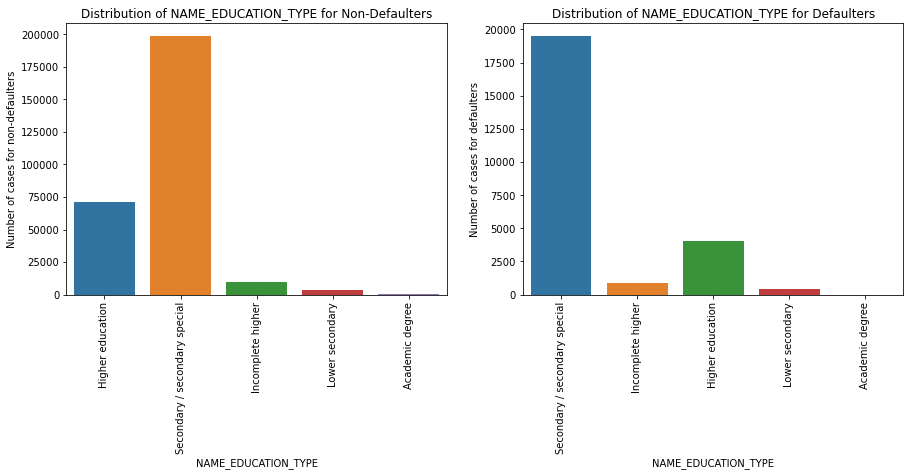

In [52]:
plotfunc('NAME_EDUCATION_TYPE')

Inference:
Higher the education lower the default rate  


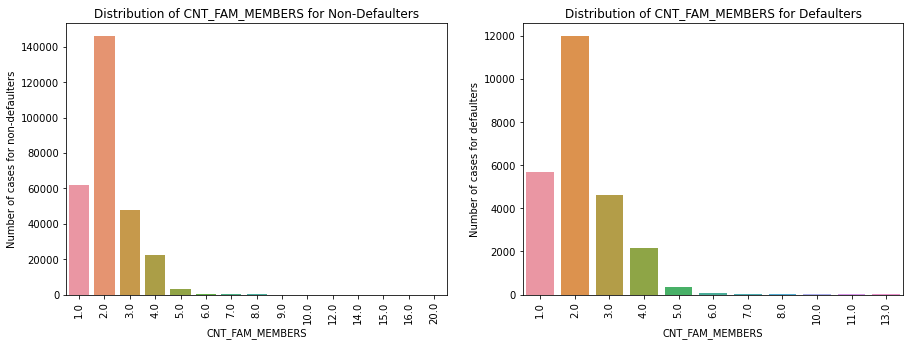

In [53]:
plotfunc('CNT_FAM_MEMBERS')

Inference:
Most of the applicants who applied for loan has 2 family members in total


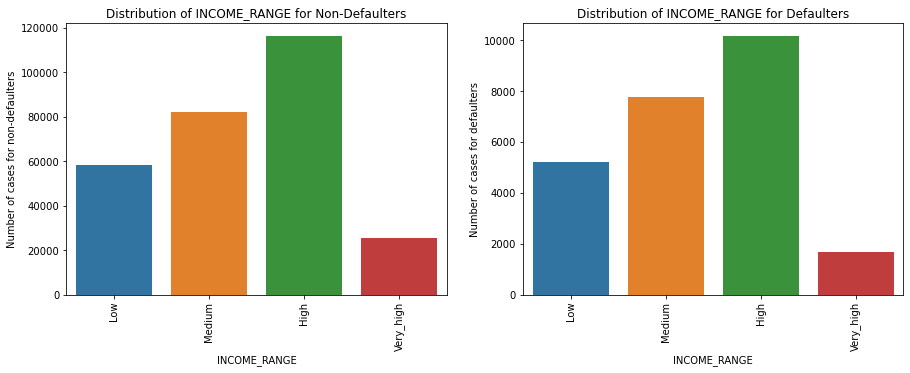

In [54]:
plotfunc('INCOME_RANGE')

In [56]:
Defaulter=target1_inp0.AGE_GROUP.value_counts()
NonDefaulter=target0_inp0.AGE_GROUP.value_counts()
print(Defaulter, NonDefaulter)

30-35       4054
35-40       3843
25-30       3667
40-45       3242
45-50       2611
50-55       2335
55-60       1833
60 above    1736
20-25       1504
Name: AGE_GROUP, dtype: int64 35-40       39030
40-45       38146
30-35       35422
60 above    33550
50-55       32662
45-50       32582
55-60       31279
25-30       29286
20-25       10729
Name: AGE_GROUP, dtype: int64


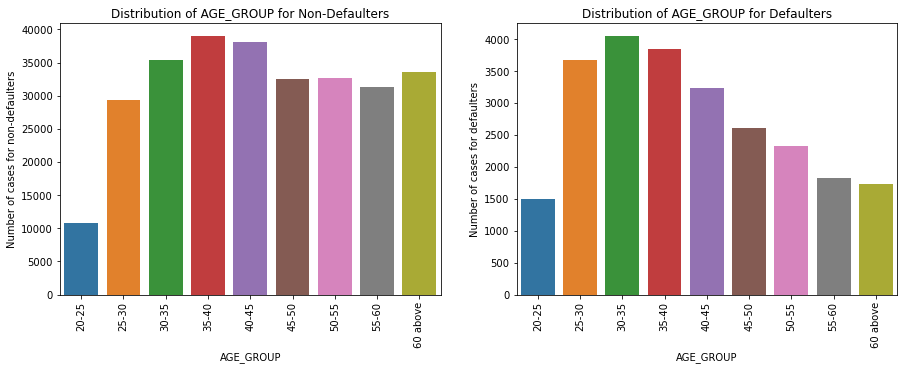

In [57]:
plotfunc('AGE_GROUP')

Inference:
Most of the defaulters are from 30-35 age group.


In [59]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 39 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   FLAG_OWN_CAR                 307511 non-null  object  
 5   FLAG_OWN_REALTY              307511 non-null  object  
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307511 non-null  float64 
 10  AMT_GOODS_PRICE              307511 non-null  float64 
 11  NAME_TYPE_SUITE              307511 non-null  object  
 12  NAME_INCOME_TYPE             307511 non-null

In [60]:
# Finding correlation for numerical columns for both target 0 and 1 
target0_corr=target0_inp0.iloc[0:,2:]
target1_corr=target1_inp0.iloc[0:,2:]

In [61]:
# Correlation for target 0
target0=target0_corr.corr(method='spearman')
target0

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE
CNT_CHILDREN,1.000000,0.038308,0.002315,0.024767,-0.001516,-0.161230,0.180517,-0.019986,0.810519,0.001725,-0.010738,0.015455,0.021523,0.027788,0.076212,0.071585,0.001811,0.001281,0.000192,0.002290,-0.003248,-0.026532,-0.375609
AMT_INCOME_TOTAL,0.038308,1.000000,0.416017,0.485689,0.419980,-0.174540,0.076387,0.035931,0.044988,0.102384,0.078372,0.161441,0.148976,0.020368,0.040087,0.040321,0.004858,0.007828,0.014120,0.080292,0.039395,0.086848,-0.093430
AMT_CREDIT,0.002315,0.416017,1.000000,0.831885,0.985088,-0.120400,0.009416,-0.001982,0.079496,0.051370,0.019093,0.045430,0.047740,-0.026649,-0.012662,0.006972,-0.002022,0.001634,-0.001306,0.049048,0.030665,-0.007678,0.057164
AMT_ANNUITY,0.024767,0.485689,0.831885,1.000000,0.830322,-0.129773,0.037717,0.016570,0.096422,0.054189,0.035819,0.075773,0.073042,-0.004962,0.009718,0.019451,0.003789,0.002964,0.012250,0.049528,0.024084,0.010513,-0.011728
AMT_GOODS_PRICE,-0.001516,0.419980,0.985088,0.830322,1.000000,-0.121765,0.009425,-0.004202,0.079168,0.058624,0.020471,0.046290,0.047915,-0.028210,-0.015606,0.004502,-0.001149,0.002000,-0.000598,0.050235,0.031691,-0.008546,0.058936
DAYS_EMPLOYED,-0.161230,-0.174540,-0.120400,-0.129773,-0.121765,1.000000,-0.037302,-0.117617,-0.177293,-0.049101,0.021749,-0.010349,-0.019504,0.022427,-0.083228,-0.098678,-0.006641,-0.000862,-0.002955,-0.048103,0.004140,-0.015442,0.234226
DAYS_REGISTRATION,0.180517,0.076387,0.009416,0.037717,0.009425,-0.037302,1.000000,0.094153,0.159042,-0.008471,0.025938,0.032723,0.024163,0.055307,0.085865,0.062442,-0.003283,-0.001357,-0.002297,-0.005511,0.000050,-0.017462,-0.297988
DAYS_ID_PUBLISH,-0.019986,0.035931,-0.001982,0.016570,-0.004202,-0.117617,0.094153,1.000000,-0.014034,0.039755,0.035392,0.049195,0.034776,0.077360,0.101050,0.062976,0.002064,-0.002375,-0.007878,-0.020751,-0.024417,-0.064412,-0.261395
CNT_FAM_MEMBERS,0.810519,0.044988,0.079496,0.096422,0.079168,-0.177293,0.159042,-0.014034,1.000000,-0.008517,-0.015909,0.006926,0.015645,0.014693,0.072018,0.077785,0.002641,0.000827,0.002176,0.006045,0.004233,-0.005365,-0.282397
HOUR_APPR_PROCESS_START,0.001725,0.102384,0.051370,0.054189,0.058624,-0.049101,-0.008471,0.039755,-0.008517,1.000000,0.052053,0.071837,0.058612,0.019765,0.020448,0.012789,-0.013045,0.002014,-0.002511,0.022231,-0.003066,-0.024384,-0.098288


In [62]:
# Now, plotting the above correlation with heat map as it is the best choice to visulaize

def targets_corr(data,title):
    plt.figure(figsize=(15, 10))

    sns.heatmap(data, cmap="RdYlGn",annot=False)

    plt.title(title, fontdict={'size': 20})
    plt.yticks(rotation=0)
    plt.show()

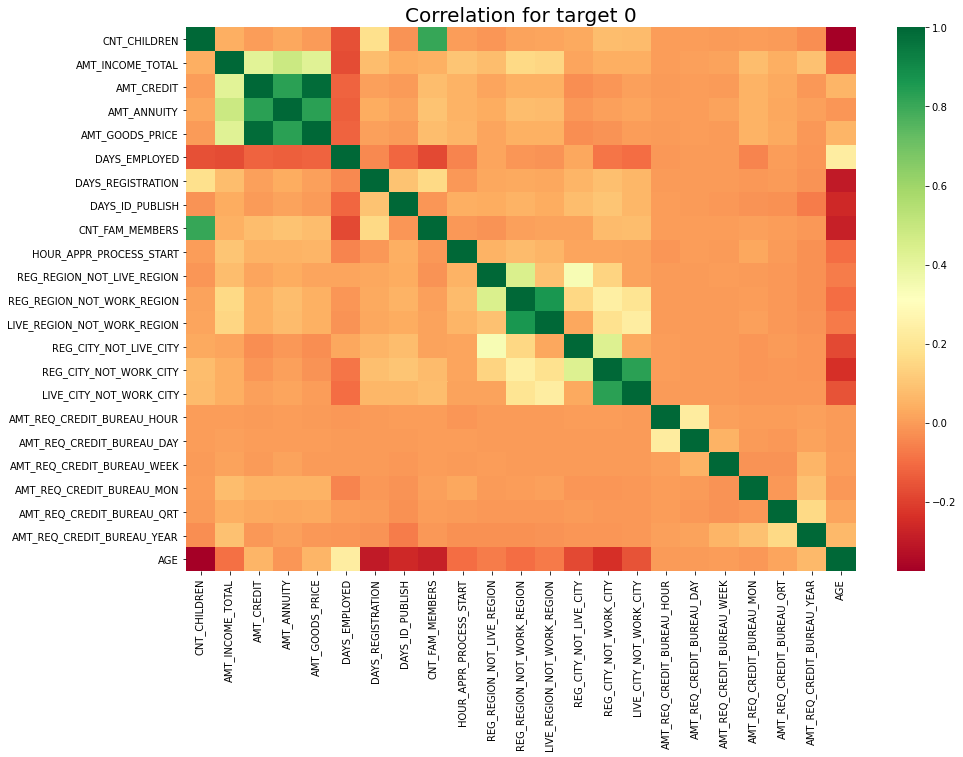

In [63]:
# Heat map for Target 0 (Non-Defaulters)

targets_corr(data=target0,title='Correlation for target 0')

In [64]:
l1=target0.unstack()
l1.sort_values(ascending=False).drop_duplicates().head(11)

AGE                         AGE                            1.000000
AMT_CREDIT                  AMT_GOODS_PRICE                0.985088
REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION    0.861861
AMT_ANNUITY                 AMT_CREDIT                     0.831885
REG_CITY_NOT_WORK_CITY      LIVE_CITY_NOT_WORK_CITY        0.830381
AMT_ANNUITY                 AMT_GOODS_PRICE                0.830322
CNT_FAM_MEMBERS             CNT_CHILDREN                   0.810519
AMT_INCOME_TOTAL            AMT_ANNUITY                    0.485689
REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION     0.446101
REG_CITY_NOT_WORK_CITY      REG_CITY_NOT_LIVE_CITY         0.435514
AMT_INCOME_TOTAL            AMT_GOODS_PRICE                0.419980
dtype: float64

Top 10 correlations for Target 0 (Non-Defaulters)
AMT_CREDIT - AMT_GOODS_PRICE

REG_REGION_NOT_WORK_REGION - LIVE_REGION_NOT_WORK_REGION

AMT_ANNUITY - AMT_CREDIT

REG_CITY_NOT_WORK_CITY - LIVE_CITY_NOT_WORK_CITY

AMT_ANNUITY - AMT_GOODS_PRICE

CNT_FAM_MEMBERS - CNT_CHILDREN

AMT_INCOME_TOTAL - AMT_ANNUITY

REG_REGION_NOT_LIVE_REGION - REG_REGION_NOT_WORK_REGION

REG_CITY_NOT_WORK_CITY - REG_CITY_NOT_LIVE_CITY

AMT_INCOME_TOTAL - AMT_GOODS_PRICE

In [65]:
# Correlation for target 1
target1=target1_corr.corr(method='spearman')
target1

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE
CNT_CHILDREN,1.000000,-0.004749,0.000200,0.033679,-0.007673,-0.116332,0.133658,-0.027320,0.823307,-0.022469,-0.025824,-0.019571,-0.009823,0.004127,0.047486,0.051352,0.001279,-0.009282,-0.002377,-0.008096,-0.009292,-0.016182,-0.267716
AMT_INCOME_TOTAL,-0.004749,1.000000,0.359276,0.431617,0.363310,-0.117761,0.036671,-0.005929,0.003867,0.088174,0.076449,0.156053,0.144970,0.008996,0.027994,0.030864,0.013234,0.001488,0.025341,0.089531,0.042510,0.117046,0.007019
AMT_CREDIT,0.000200,0.359276,1.000000,0.811443,0.976961,-0.083601,-0.017099,-0.053780,0.067447,0.028537,0.014192,0.030331,0.032564,-0.028544,-0.029571,-0.011182,0.004793,-0.002350,0.007337,0.050261,-0.005418,0.010402,0.154980
AMT_ANNUITY,0.033679,0.431617,0.811443,1.000000,0.805122,-0.096587,0.035900,-0.014472,0.088604,0.032083,0.030930,0.063880,0.062370,-0.002849,0.007397,0.014922,0.013673,-0.003329,0.028728,0.061814,0.001132,0.007919,0.030224
AMT_GOODS_PRICE,-0.007673,0.363310,0.976961,0.805122,1.000000,-0.085768,-0.019012,-0.059661,0.064366,0.039962,0.017151,0.034046,0.035256,-0.029816,-0.032750,-0.012932,0.007875,-0.002286,0.008317,0.053699,-0.002204,0.012108,0.157216
DAYS_EMPLOYED,-0.116332,-0.117761,-0.083601,-0.096587,-0.085768,1.000000,-0.017716,-0.049799,-0.144711,-0.027246,0.037032,0.016830,0.002150,0.046567,-0.025656,-0.055327,0.001301,0.016146,0.006435,-0.036495,0.004115,-0.052978,0.107577
DAYS_REGISTRATION,0.133658,0.036671,-0.017099,0.035900,-0.019012,-0.017716,1.000000,0.095750,0.126736,-0.032019,0.015237,0.014323,0.010359,0.033891,0.071324,0.052747,-0.002048,-0.003082,0.003172,0.010919,-0.007793,-0.012399,-0.232915
DAYS_ID_PUBLISH,-0.027320,-0.005929,-0.053780,-0.014472,-0.059661,-0.049799,0.095750,1.000000,-0.029132,0.026347,0.032654,0.032845,0.019967,0.068605,0.070867,0.031407,-0.000409,-0.015088,-0.003494,-0.024190,-0.009547,-0.081824,-0.251020
CNT_FAM_MEMBERS,0.823307,0.003867,0.067447,0.088604,0.064366,-0.144711,0.126736,-0.029132,1.000000,-0.028840,-0.027244,-0.026123,-0.015591,-0.003933,0.044079,0.059079,0.001033,-0.014221,0.000300,-0.002100,0.002283,0.021053,-0.172064
HOUR_APPR_PROCESS_START,-0.022469,0.088174,0.028537,0.032083,0.039962,-0.027246,-0.032019,0.026347,-0.028840,1.000000,0.048070,0.065472,0.052126,0.007850,0.019658,0.014637,-0.014616,-0.012947,-0.001160,0.026152,0.005259,-0.012649,-0.065710


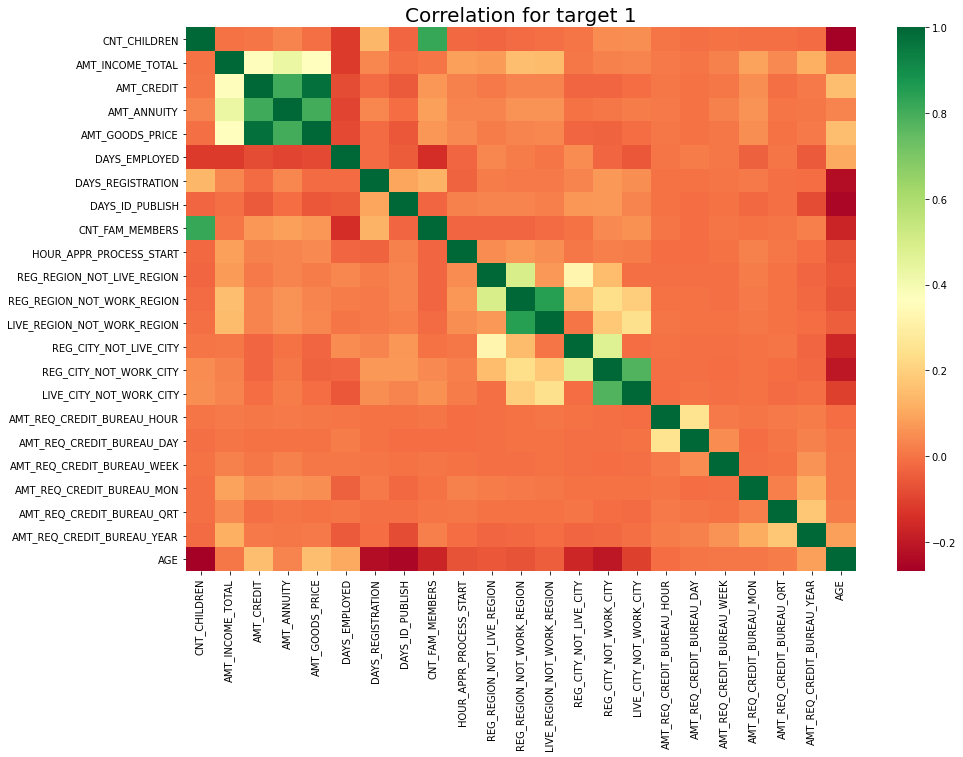

In [66]:
# Heat map for Target 1 (Defaulters)

targets_corr(data=target1,title='Correlation for target 1')

In [67]:
l1=target1.unstack()
l1.sort_values(ascending=False).drop_duplicates().head(11)

AGE                         AGE                            1.000000
AMT_GOODS_PRICE             AMT_CREDIT                     0.976961
REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION    0.847885
CNT_FAM_MEMBERS             CNT_CHILDREN                   0.823307
AMT_CREDIT                  AMT_ANNUITY                    0.811443
AMT_GOODS_PRICE             AMT_ANNUITY                    0.805122
LIVE_CITY_NOT_WORK_CITY     REG_CITY_NOT_WORK_CITY         0.778540
REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION     0.497937
REG_CITY_NOT_LIVE_CITY      REG_CITY_NOT_WORK_CITY         0.472052
AMT_INCOME_TOTAL            AMT_ANNUITY                    0.431617
                            AMT_GOODS_PRICE                0.363310
dtype: float64

Top 10 correlations for Target 1 (Defaulters)
AMT_GOODS_PRICE - AMT_CREDIT

REG_REGION_NOT_WORK_REGION - LIVE_REGION_NOT_WORK_REGION

CNT_FAM_MEMBERS - CNT_CHILDREN

AMT_CREDIT - AMT_ANNUITY

AMT_GOODS_PRICE - AMT_ANNUITY

LIVE_CITY_NOT_WORK_CITY - REG_CITY_NOT_WORK_CITY

REG_REGION_NOT_LIVE_REGION - REG_REGION_NOT_WORK_REGION

REG_CITY_NOT_LIVE_CITY - REG_CITY_NOT_WORK_CITY

AMT_INCOME_TOTAL - AMT_ANNUITY

AMT_INCOME_TOTAL - AMT_GOODS_PRICE

Univariate analysis on continuous variables

In [68]:
# defining function for plotting contnous variables
def plotcont(var):
    plt.figure(figsize=(15,5))
    
    plt.subplot(1, 2, 1)
    target0_inp0[var].plot.hist()
    plt.title('Distribution for Non-Defaulters', fontsize=14)
    plt.xlabel(var)
    plt.xticks(rotation=90)
    
    plt.subplot(1, 2, 2)
    target1_inp0[var].plot.hist()
    plt.title('Distribution for Defaulters', fontsize=14)
    plt.xlabel(var)
    plt.xticks(rotation=90)
    plt.show()

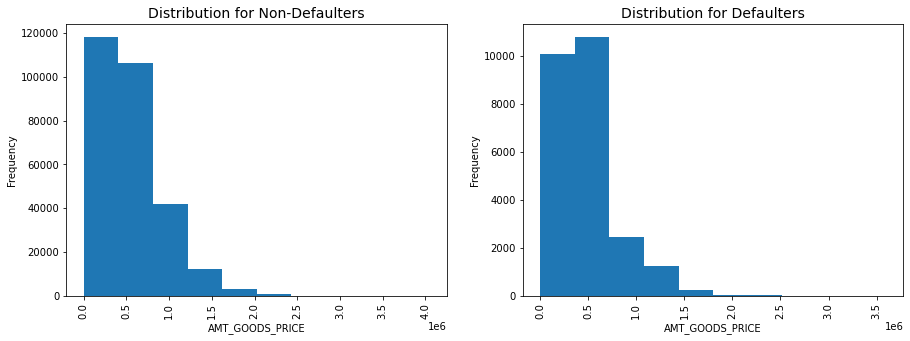

In [69]:
plotcont('AMT_GOODS_PRICE')

Defaulters are higher for price of the goods for which the loan is given is lesser (between 0 to 700,000)


Univariate analysis on numerical variables

In [70]:
def univariate_numerical(var):
    plt.figure(figsize=(15,5))
    
    plt.subplot(1, 2, 1)
    sns.boxplot(var, data=target0_inp0)
    plt.title('Distribution of '+ '%s' %var +' for Non-Defaulters', fontsize=12)
    plt.xlabel(var)
    plt.xticks(rotation=90)
    plt.ylabel('Number of cases for non-defaulters')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(var, data=target1_inp0)
    plt.title('Distribution of '+ '%s' %var +' for Defaulters', fontsize=12)
    plt.xlabel(var)
    plt.xticks(rotation=90)
    plt.ylabel('Number of cases for defaulters')
    plt.show()

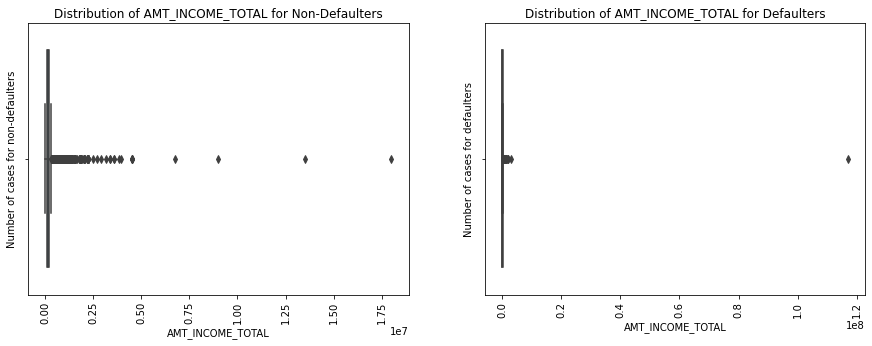

In [71]:
univariate_numerical(var='AMT_INCOME_TOTAL')

Inference Points concluded from the above graph.
Some outliers are noticed in income amount for both defaulters and Non-Defaulters.
The third quartiles is very slim for income amount in both the graphs
 

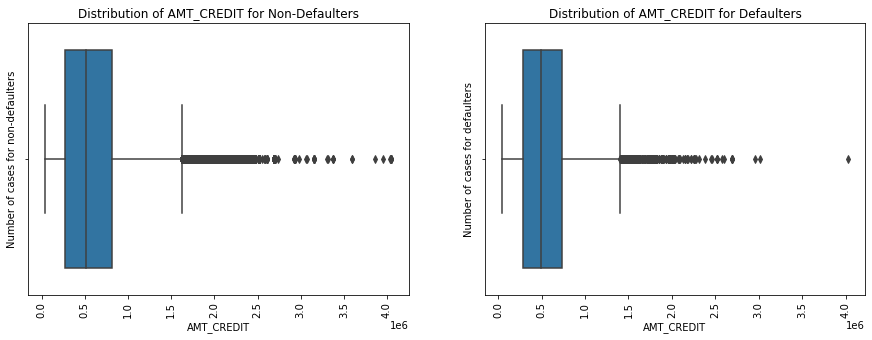

In [72]:
univariate_numerical(var='AMT_CREDIT')

Inference
Some outliers are noticed in credit amount.
IQR lies towards the lower whiskers.

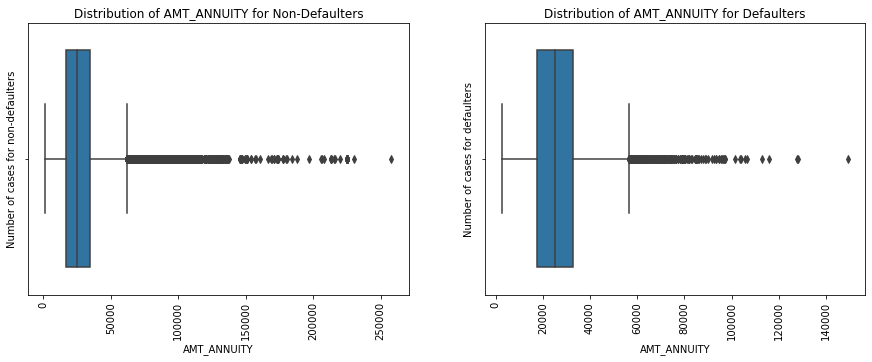

In [73]:
univariate_numerical(var='AMT_ANNUITY')

Some outliers are noticed in annunity amount.
IQR lies towards the lower whiskers.


Bivariate Analysis of numerical variables for both 0 and 1

For Target 0 (Non-Defaulters)

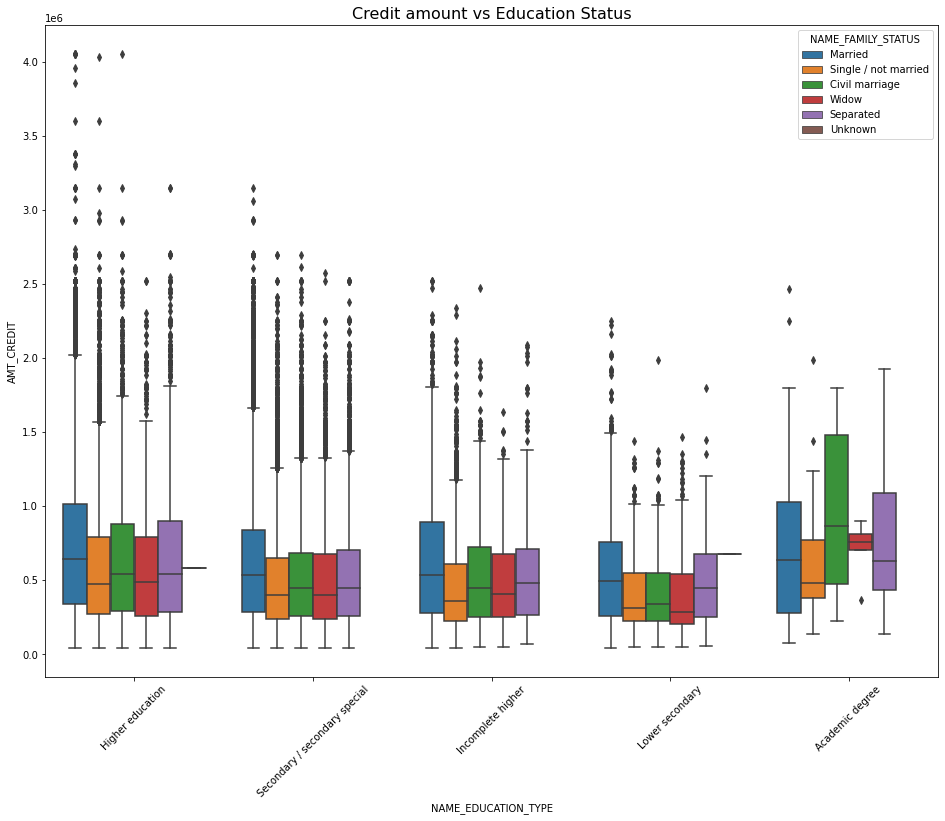

In [74]:
# Box plotting for Credit amount

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data =target0_inp0, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit amount vs Education Status', fontsize=16)
plt.show()

inference
Family status of 'civil marriage', 'marriage' and 'separated' of Academic degree education are having higher credit amount than others.
Higher education of family status of 'marriage', 'single' and 'civil marriage' are having more outliers.
Civil marriage for Academic degree is having most of the credits in the third quartile.


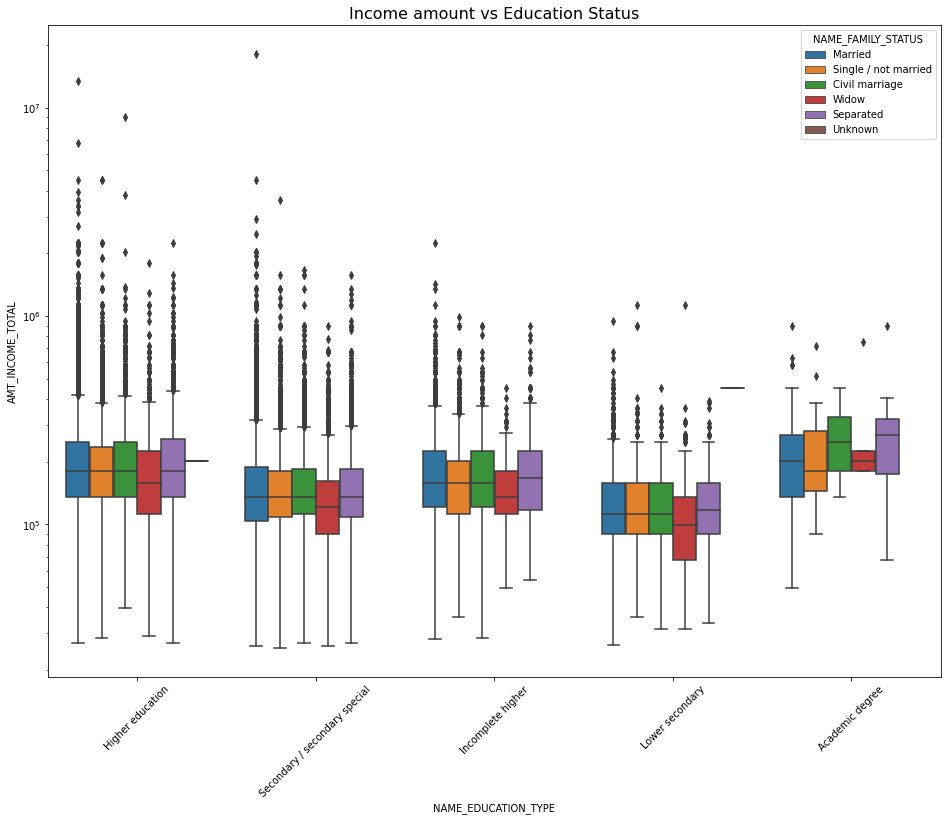

In [75]:
# Box plotting for Income amount in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =target0_inp0, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status', fontsize=16)
plt.show()

Academic education category have less number of defaulters!

For Target 1 (Defaulters)

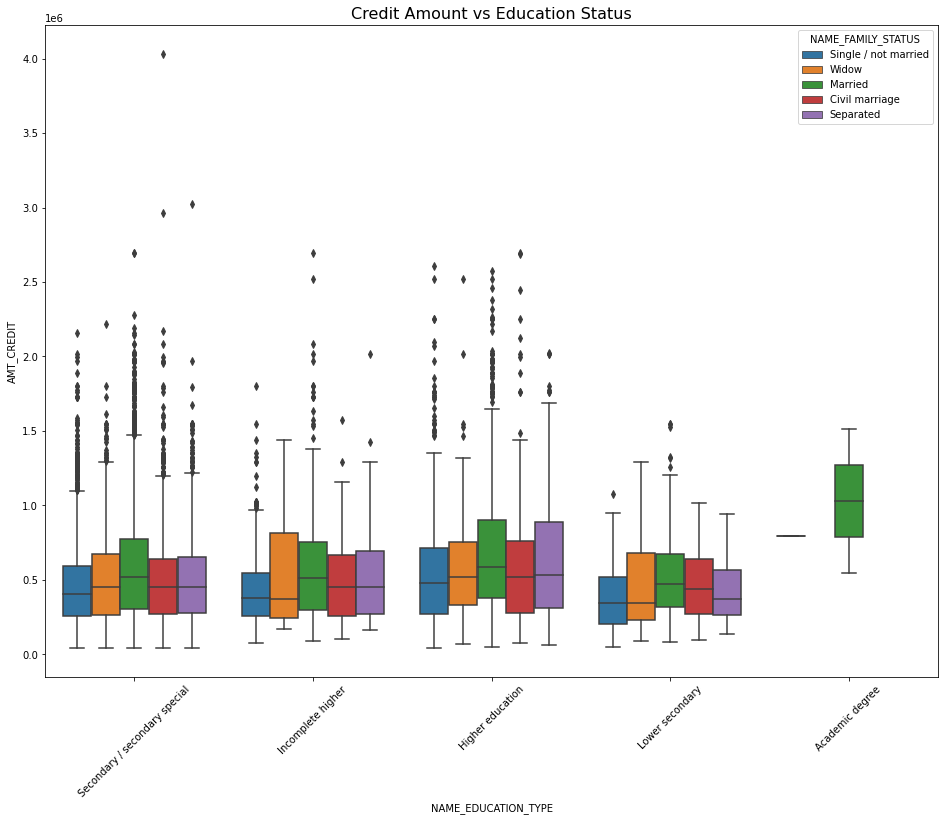

In [76]:
# Box plotting for credit amount

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data =target1_inp0, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit Amount vs Education Status', fontsize=16)
plt.show()

Inference

Academic education category have less number of defaulters.

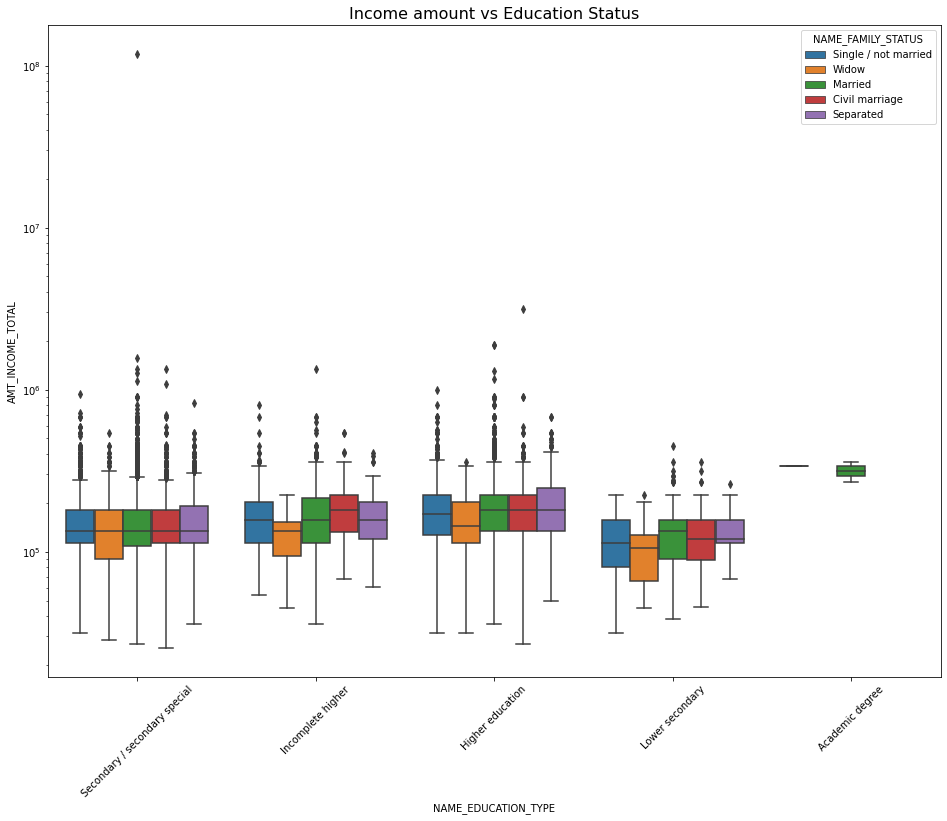

In [77]:
# Box plotting for Income amount in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =target1_inp0, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status', fontsize=16)
plt.show()

Inference
Academic education category have less number of defaulters.
Secondary / secondary special eduation category type have almost same Median!

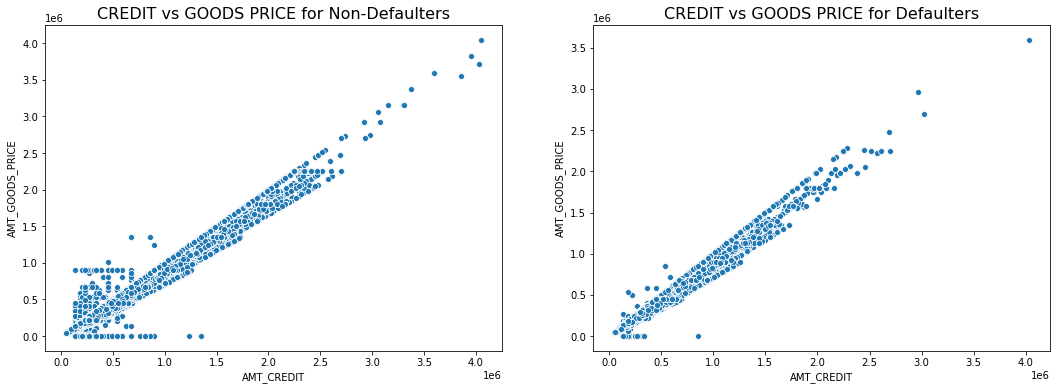

In [79]:
plt.figure(figsize=(18,6))
plt.subplot(121)
sns.scatterplot(x='AMT_CREDIT',y='AMT_GOODS_PRICE',data=target0_inp0)
plt.title('CREDIT vs GOODS PRICE for Non-Defaulters' , fontsize=16)

plt.subplot(122)
sns.scatterplot(x='AMT_CREDIT',y='AMT_GOODS_PRICE',data=target1_inp0)
plt.title('CREDIT vs GOODS PRICE for Defaulters', fontsize=16)
plt.show()

Defaulters are less if price of good is upto 500k and amount credit is also less than 500k


Previous Application data analysis

In [80]:
# Reading the dataset of previous application

df1=pd.read_csv("previous_application.csv")
df1

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.000000,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,Y,1,0.000000,NaN,NaN,XAP,Approved,-544,Cash through the bank,XAP,NaN,Refreshed,Furniture,POS,XNA,Stone,43,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,Y,1,0.340554,NaN,NaN,XAP,Approved,-1694,Cash through the bank,XAP,Unaccompanied,New,Furniture,POS,XNA,Stone,43,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,Y,1,0.101401,NaN,NaN,XAP,Approved,-1488,Cash through the bank,XAP,"Spouse, partner",Repeater,Consumer Electronics,POS,XNA,Country-wide,1370,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,Y,1,NaN,NaN,NaN,XNA,Approved,-1185,Cash through the bank,XAP,Family,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0


In [81]:
df1.isnull().sum()*100/len(df1)

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [82]:
#Removing columns having more than 40% missing values
df1 = df1.loc[:, df1.isnull().mean() <= .4]

In [83]:
# Removing the column values of 'XNA' and 'XAP'

df1=df1.drop(df1[df1['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
df1=df1.drop(df1[df1['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
df1=df1.drop(df1[df1['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)

df1.shape

(69635, 26)

In [85]:
merged = pd.merge(inp0, df1, how='left', on=['SK_ID_CURR'])

In [86]:
merged.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,INCOME_RANGE,AGE,AGE_GROUP,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,-637,-3648.0,-2120,Laborers,1.0,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0,0.0,0.0,0.0,0.0,1.0,High,26,25-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,-1188,-1186.0,-291,Core staff,2.0,MONDAY,11,0,0,0,0,0,0,School,0,0.0,0.0,0.0,0.0,0.0,High,46,45-50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,-225,-4260.0,-2531,Laborers,1.0,MONDAY,9,0,0,0,0,0,0,Government,0,0.0,0.0,0.0,0.0,0.0,Low,53,50-55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,-3039,-9833.0,-2437,Laborers,2.0,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0,0.0,0.0,0.0,0.0,0.0,Medium,53,50-55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,-3038,-4311.0,-3458,Core staff,1.0,THURSDAY,11,0,0,0,0,1,1,Religion,0,0.0,0.0,0.0,0.0,0.0,Medium,55,50-55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
merged.shape

(331007, 64)

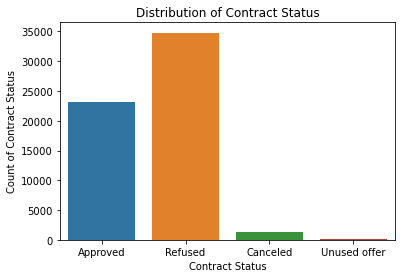

In [88]:
sns.countplot(merged.NAME_CONTRACT_STATUS)
plt.xlabel("Contract Status")
plt.ylabel("Count of Contract Status")
plt.title("Distribution of Contract Status")
plt.show()

Inference
Number of refused application are more as compared to approved applications.


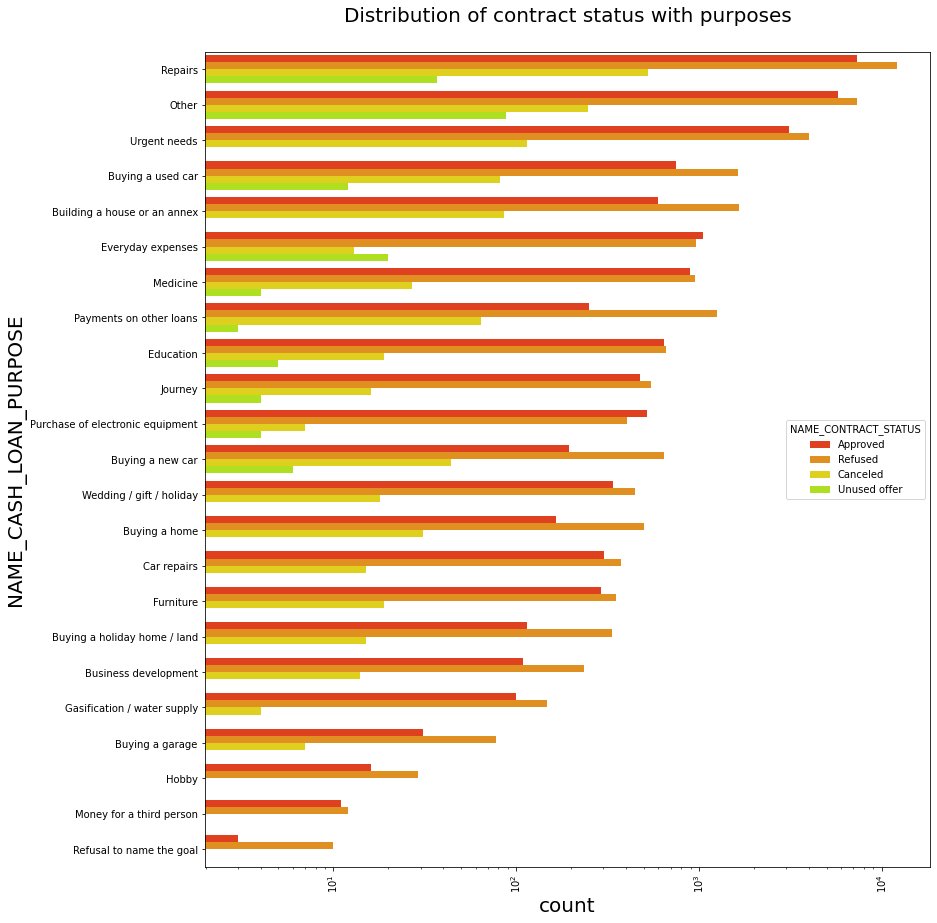

In [89]:
# Distribution of contract status in logarithmic scale

plt.figure(figsize=(13,15))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of contract status with purposes')
ax = sns.countplot(data = merged, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=merged['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='prism')

Most rejection of loans came from purpose 'repairs'.
For purchase of electronics equipment approved requests are more as compared with refused.
For education purposes we have almost equal number of approves and rejection
Payment on other loans is having significant higher rejection than approves.


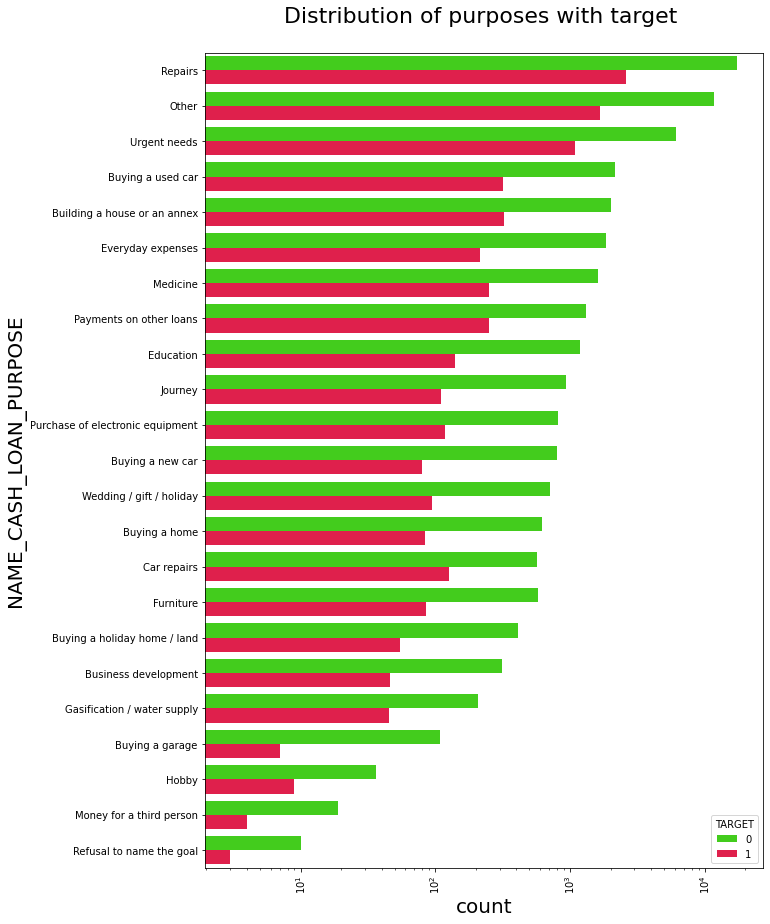

In [90]:
# Distribution of contract status

plt.figure(figsize=(10,15))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of purposes with target ')
ax = sns.countplot(data = merged, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=merged['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET',palette='prism')

Inference

Loan purposes with 'Repairs' are facing more difficulites in payment on time.
There are few places where loan payment is significant higher than facing difficulties. They are 'Buying a garage', 'Business developemt', 'Buying land','Buying a new car' and 'Education' Hence we can focus on these purposes for which the client is having for minimal payment difficulties.

In [91]:
approved=merged[merged.NAME_CONTRACT_STATUS=='Approved']
refused=merged[merged.NAME_CONTRACT_STATUS=='Refused']
canceled=merged[merged.NAME_CONTRACT_STATUS=='Canceled']
unused=merged[merged.NAME_CONTRACT_STATUS=='Unused Offer']

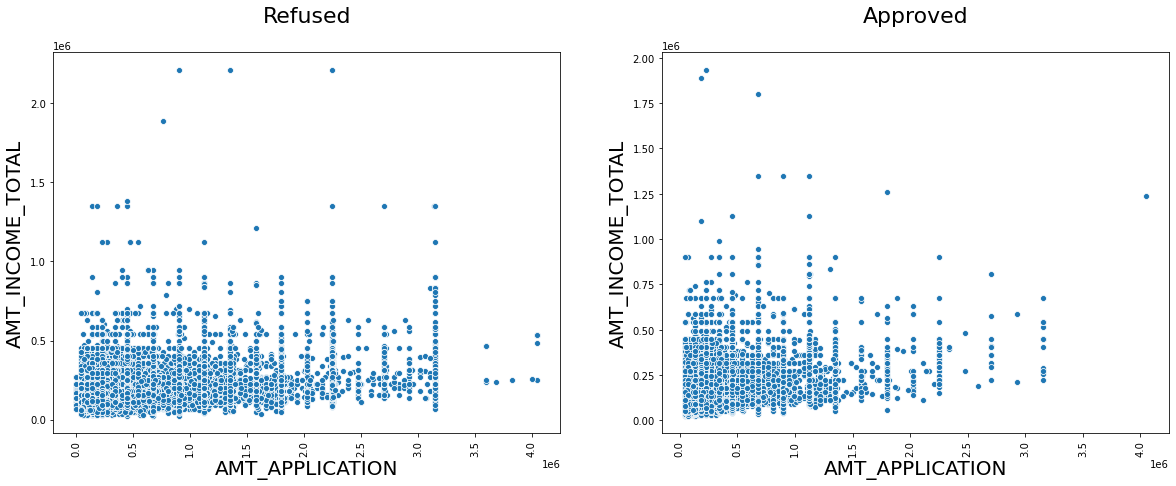

In [92]:
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
sns.scatterplot(x='AMT_APPLICATION',y='AMT_INCOME_TOTAL',data=refused)
plt.title('Refused')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.scatterplot(x='AMT_APPLICATION',y='AMT_INCOME_TOTAL',data=approved)
plt.title('Approved')
plt.xticks(rotation=90)
plt.show()

Inference Loan request higher than 200k had a higher rejection rate. Also loan rejection rate was much lower if the income was higher than 500k.
